In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
superstore = pd.read_csv("Sample - Superstore.csv", encoding = 'latin1')

# by default pandas use UFT-8 for encooding file
# if your file has some characters that isn't valid the latin1 is use.

In [3]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Analytics

In [8]:
superstore.shape

(9994, 21)

In [10]:
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [14]:
superstore['Order_Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship_Date'] = pd.to_datetime(superstore['Ship Date'])

In [16]:
superstore.dtypes

Row ID                    int64
Order ID                 object
Order Date               object
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
dtype: object

In [18]:
# delete the unnecessary columns
superstore.drop(['Row ID', 'Order ID','Order Date','Ship Date','Customer ID', 'Product ID','Postal Code'], axis=1, inplace = True) 

In [20]:
superstore['order_year'] = superstore['Order_Date'].dt.year
superstore['ship_year'] = superstore['Ship_Date'].dt.year

In [22]:
superstore.head()

,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Date,Ship_Date,order_year,ship_year
0,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08,2016-11-11,2016,2016
1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08,2016-11-11,2016,2016
2,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12,2016-06-16,2016,2016
3,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11,2015-10-18,2015,2015
4,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11,2015-10-18,2015,2015


In [24]:
# sales of each product
prod_sales = superstore.groupby(['Sub-Category']).Sales.sum().round(2)
prod_sales

Sub-Category
Accessories    167380.32
Appliances     107532.16
Art             27118.79
Binders        203412.73
Bookcases      114880.00
Chairs         328449.10
Copiers        149528.03
Envelopes       16476.40
Fasteners        3024.28
Furnishings     91705.16
Labels          12486.31
Machines       189238.63
Paper           78479.21
Phones         330007.05
Storage        223843.61
Supplies        46673.54
Tables         206965.53
Name: Sales, dtype: float64

In [26]:
# top 5 selling products
prod_sales.sort_values(ascending = False).head(5)

Sub-Category
Phones     330007.05
Chairs     328449.10
Storage    223843.61
Tables     206965.53
Binders    203412.73
Name: Sales, dtype: float64

In [28]:
# top 10 selling cities
city_sales = superstore.groupby(['City']).Sales.sum()
city_sales.sort_values(ascending = False).head(10)

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64

In [30]:
superstore.groupby(['Segment']).Sales.agg(['mean','median'])

,mean,median
Segment,,
Consumer,223.733644,53.72
Corporate,233.823300,56.54
Home Office,240.972041,52.44


In [32]:
# total profit on each product
prod_profit = superstore.groupby(['Sub-Category']).Profit.sum().round(2)
prod_profit

Sub-Category
Accessories    41936.64
Appliances     18138.01
Art             6527.79
Binders        30221.76
Bookcases      -3472.56
Chairs         26590.17
Copiers        55617.82
Envelopes       6964.18
Fasteners        949.52
Furnishings    13059.14
Labels          5546.25
Machines        3384.76
Paper          34053.57
Phones         44515.73
Storage        21278.83
Supplies       -1189.10
Tables        -17725.48
Name: Profit, dtype: float64

In [34]:
# products that company loss
prod_profit[prod_profit < 0]

Sub-Category
Bookcases    -3472.56
Supplies     -1189.10
Tables      -17725.48
Name: Profit, dtype: float64

### Visualization

In [37]:
superstore.head()

,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Date,Ship_Date,order_year,ship_year
0,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08,2016-11-11,2016,2016
1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08,2016-11-11,2016,2016
2,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12,2016-06-16,2016,2016
3,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11,2015-10-18,2015,2015
4,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11,2015-10-18,2015,2015


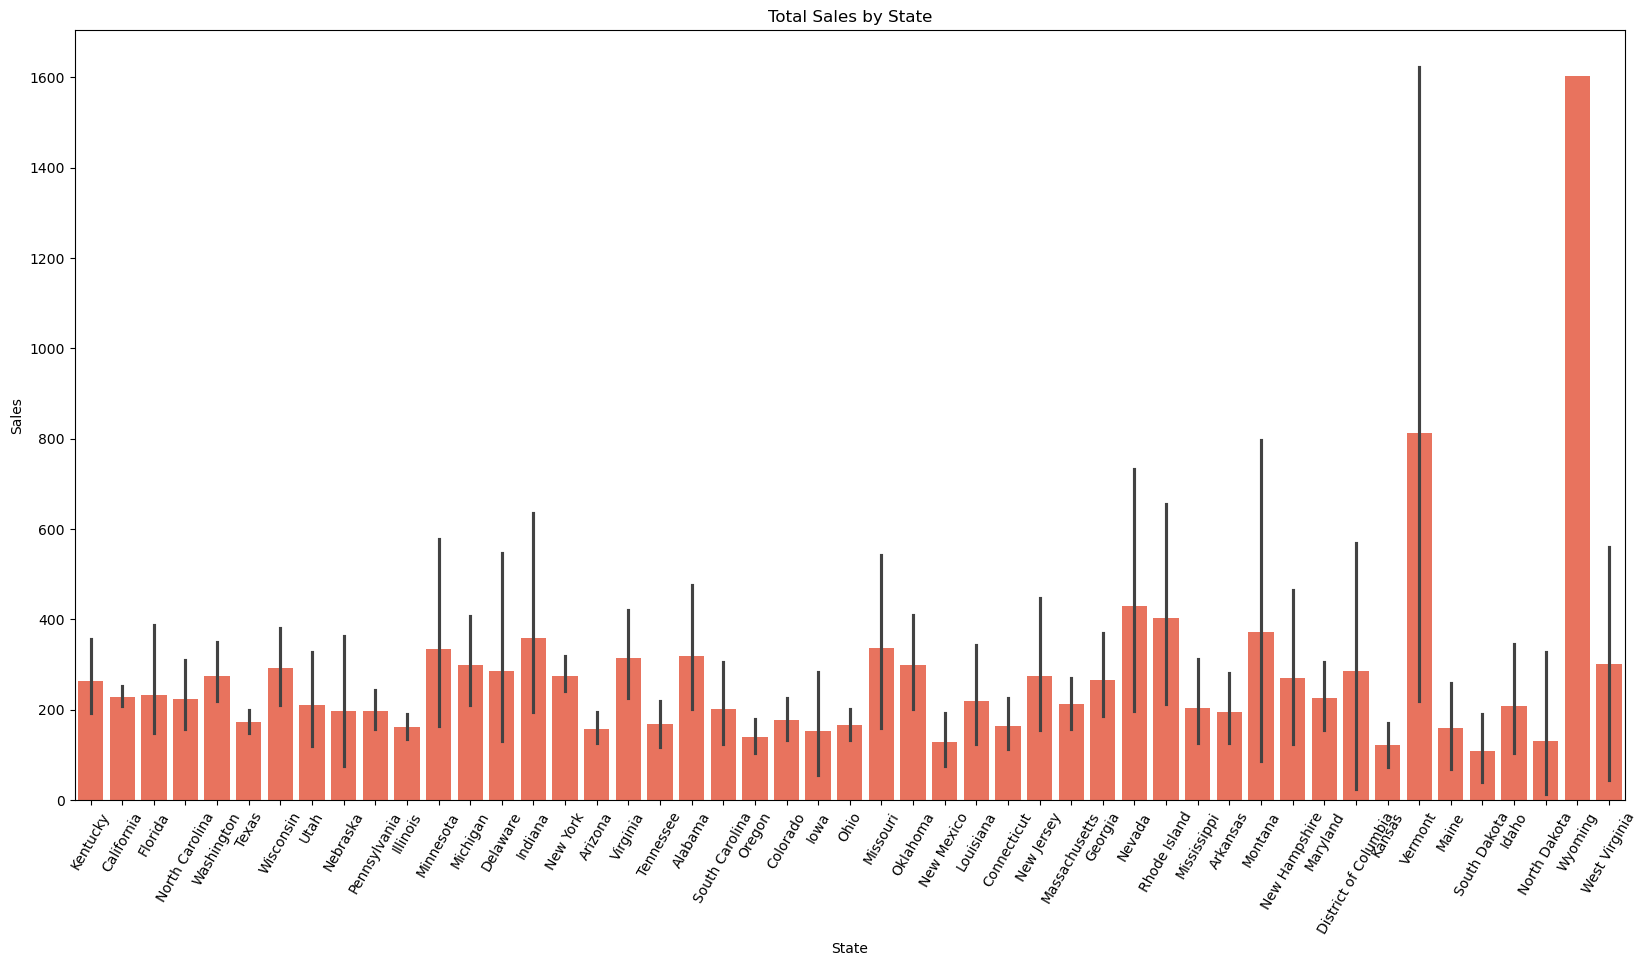

In [137]:
plt.figure(figsize=(20,10))
sns.barplot(x='State', y='Sales', data= superstore, color='tomato')
plt.xticks(rotation = 60)
plt.title("Total Sales by State")
plt.show()

from above graph I conclude that in wyoming & Vermont have a high sale.

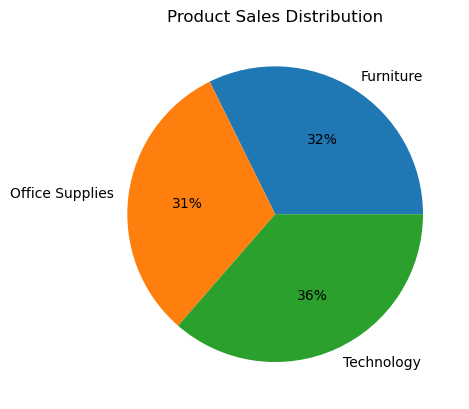

In [49]:
# sales distribution by category

prod_sales1 = superstore.groupby(['Category']).Sales.sum().round(2)

plt.pie(x=prod_sales1, labels= prod_sales1.index, autopct='%1.0f%%' )
plt.title("Product Sales Distribution")
plt.show()

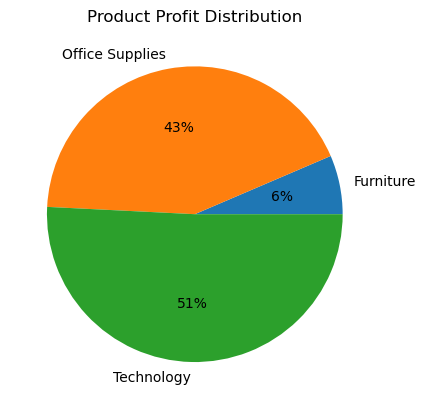

In [51]:
# profit by product
prod_sales1 = superstore.groupby(['Category']).Profit.sum().round(2)

plt.pie(x=prod_sales1, labels= prod_sales1.index, autopct='%1.0f%%' )
plt.title("Product Profit Distribution")
plt.show()

Products in Tachnology gives the highest profit that is 51%. and Furniture products gives minimum profit.

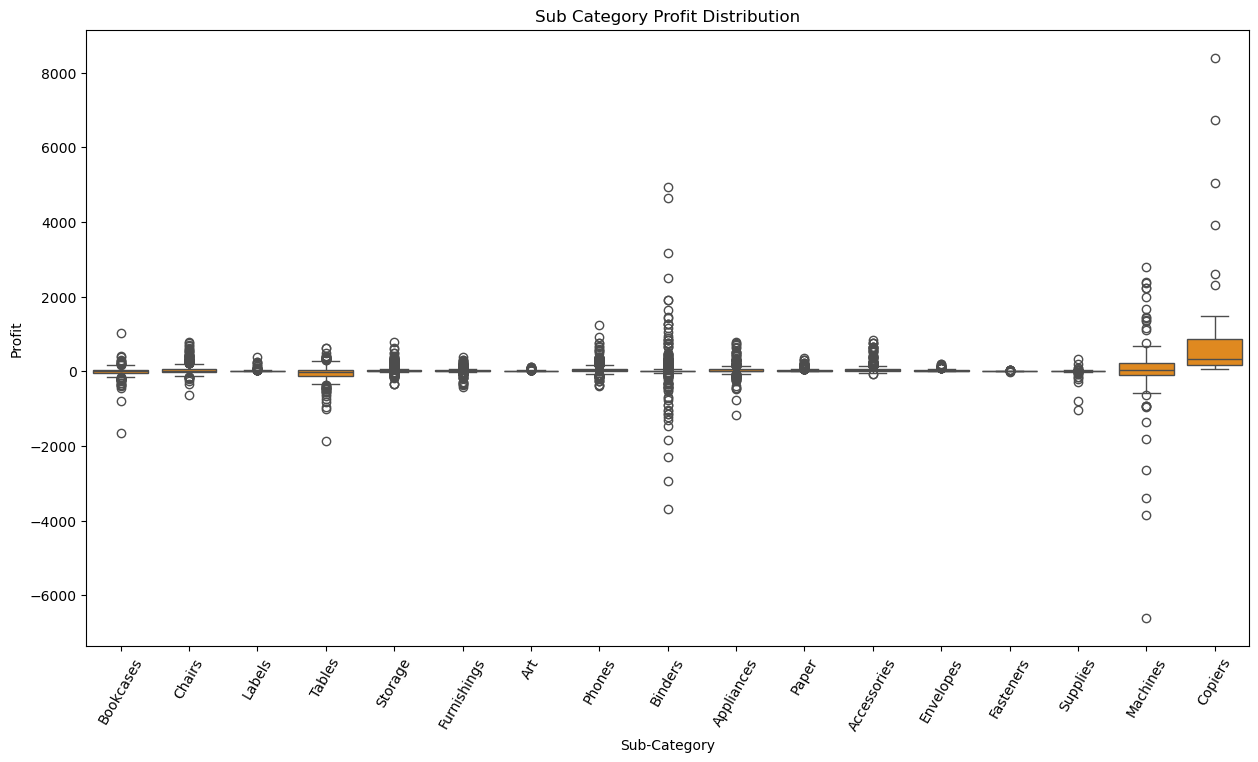

In [135]:
# profit by sub category
plt.figure(figsize=(15,8))
sns.boxplot(x='Sub-Category', y='Profit', data = superstore, color='darkorange')
plt.title("Sub Category Profit Distribution")
plt.xticks(rotation=60)
plt.show()

Copiers always gives the profit.

<Axes: xlabel='Region', ylabel='Sales'>

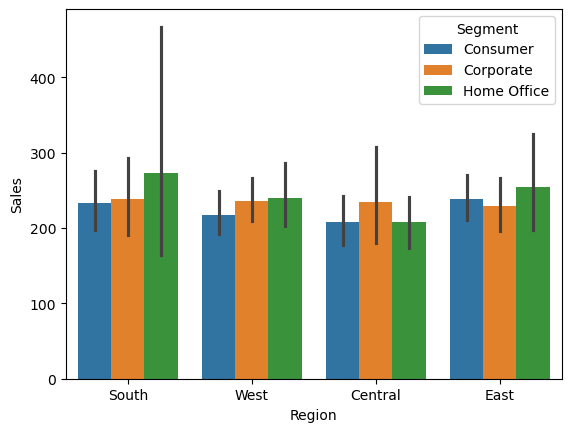

In [79]:
sns.barplot(x='Region', y='Sales', data= superstore, hue='Segment')

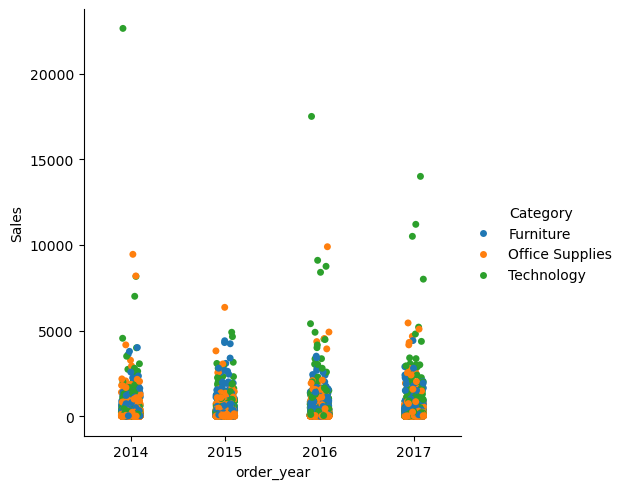

In [83]:
sns.catplot(x='order_year', y='Sales', data=superstore, hue='Category')

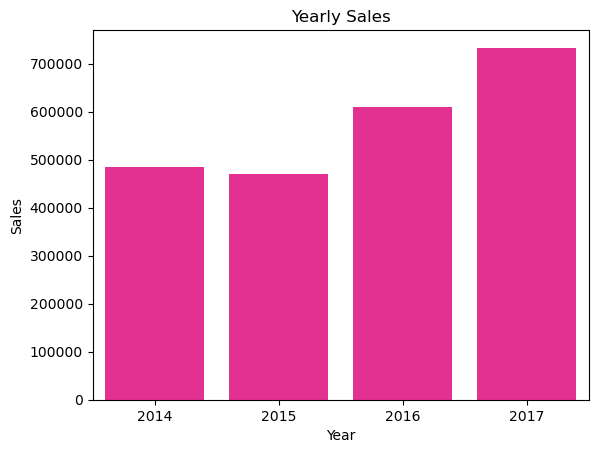

In [133]:
yearly_sales = superstore.groupby('order_year').Sales.sum()

sns.barplot(x=yearly_sales.index, y=yearly_sales, color='deeppink')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Sales")
plt.show()

<Axes: xlabel='order_year', ylabel='Sales'>

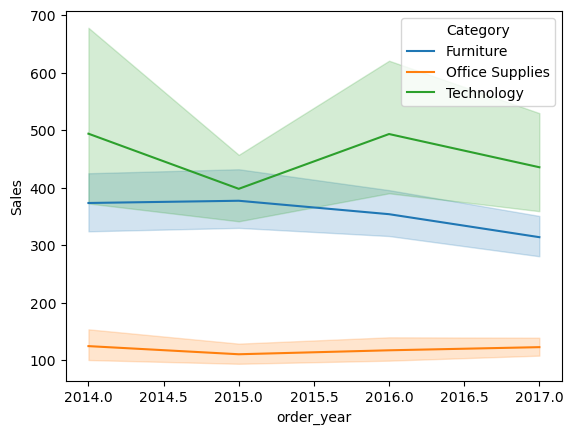

In [141]:
sns.lineplot(x='order_year', y='Sales', data= superstore, hue='Category')